<a href="https://colab.research.google.com/github/Musu1/Udacity_DataScience/blob/master/1MiniBatch_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apply **Mini Batch** Gradient descent with **Mean Sqaured error** function on data points







In [0]:
import numpy as np;
import matplotlib.pyplot as plt
np.random.seed(45);

In [0]:
#Since we are using mean squared error then derivative of error with respect to w1 is (y-y_pred)*x

def MSE(x,y,w,b,learn_rate=0.05):
  y_pred=np.matmul(x,w)+b;
  error=abs(y-y_pred);

  w_new=w+learn_rate*np.matmul(error,x);
  b_new=b+learn_rate*error.sum();

  return w_new,b_new

In [0]:
def miniBatch(x,y,batch_size=20,learn_rate=0.05,num_iter=1000):
  n_points=x.shape[0]
  w=np.zeros(x.shape[1])
  b=0

  regression_coeff=[np.hstack((w,b))]

  for _ in range(num_iter):
    batch=np.random.choice(range(n_points),batch_size);
    x_batch=x[batch,:];
    y_batch=y[batch];
    w_new,b_new=MSE(x_batch,y_batch,w,b);
    regression_coeff.append(np.hstack((w_new,b_new)))
  return regression_coeff

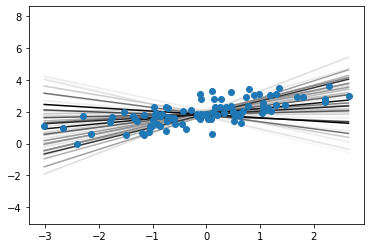

In [31]:
data=np.loadtxt('data.csv',delimiter=',');
x=data[:,:-1];
y=data[:,-1];
regression_coeff=miniBatch(x,y);
plt.figure()
X_min = x.min()
X_max = x.max()
counter = len(regression_coeff)
for W, b in regression_coeff:
  counter -= 1
  color = [1 - 0.92 ** counter for _ in range(3)]
  plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(x, y, zorder = 3)
plt.show()
